In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load Data
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/call_center.csv', delimiter=';')
print("Dataset Info:")
df.info()
print("\nDescriptive Statistics:\n", df.describe())

Mounted at /content/drive
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32941 entries, 0 to 32940
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        32940 non-null  object 
 1   Customer_name             32941 non-null  object 
 2   Sentiment                 32941 non-null  object 
 3   Csat_score                12271 non-null  float64
 4     Call_timestamp          32941 non-null  object 
 5   Call_day                  32941 non-null  int64  
 6   Reason                    32941 non-null  object 
 7   City                      32941 non-null  object 
 8   State                     32941 non-null  object 
 9   Channel                   32941 non-null  object 
 10  Response_time             32941 non-null  object 
 11  Call duration in minutes  32941 non-null  int64  
 12  Call_center               32941 non-null  object 
dtypes: float64(1), int64(

In [ ]:
df.head()

,Id,Customer_name,Sentiment,Csat_score,Call_timestamp,Call_day,Reason,City,State,Channel,Response_time,Call duration in minutes,Call_center
0,QGK-72219678-w-102139-KY,Analise Gairdner,Neutral,7.0,29/10/2020,29,Billing Question,Detroit,Michigan,Call-Center,Within SLA,17,Los Angeles/CA
1,GYJ-30025932-A-023015-LD,Crichton Kidsley,Very Positive,NaN,05/10/2020,5,Service Outage,Spartanburg,South Carolina,Chatbot,Within SLA,23,Baltimore/MD
2,ZJI-96807559-i-620008-m7,Averill Brundrett,Negative,NaN,04/10/2020,4,Billing Question,Gainesville,Florida,Call-Center,Above SLA,45,Los Angeles/CA
3,DDU-69451719-O-176482-Fm,Noreen Lafflina,Very Negative,1.0,17/10/2020,17,Billing Question,Portland,Oregon,Chatbot,Within SLA,12,Los Angeles/CA
4,JVI-79728660-U-224285-4a,Toma Van der Beken,Very Positive,NaN,17/10/2020,17,Payments,Fort Wayne,Indiana,Call-Center,Within SLA,23,Los Angeles/CA


## data cleaning

In [ ]:
df=df.copy(deep=True)

In [ ]:
# 1. bersihkan nama kolom
df.columns = df.columns.str.strip()

In [ ]:
# 2. Konversi kolom tanggal ke format datetime
df['Call_timestamp'] = pd.to_datetime(df['Call_timestamp'], errors='coerce')

In [ ]:
# 3. Standarisasi teks pada kolom kategorikal
text_cols = ['Sentiment', 'Reason', 'Response_time', 'Channel', 'Call_center', 'City', 'State']
for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.title()

In [ ]:
# 4. Penanganan nilai duplikat
df.drop_duplicates(inplace=True)

In [ ]:
# 5. Penanganan nilai kosong
# - Isi Csat_score dengan rata-rata per Channel
df['Csat_score'] = df.groupby('Channel')['Csat_score'].transform(lambda x: x.fillna(round(x.mean())))

In [ ]:
# - Pastikan hasil akhir integer
df['Csat_score'] = df['Csat_score'].round().astype('Int64')

In [ ]:
# - Isi durasi panggilan kosong dengan median per Channel
df['Call duration in minutes'] = df.groupby('Channel')['Call duration in minutes']\
    .transform(lambda x: x.fillna(round(x.median())))

In [ ]:
 #6. Validasi dan filter nilai ekstrem
# - Pastikan skor CSAT hanya antara 1 sampai 10
df = df[(df['Csat_score'] >= 1) & (df['Csat_score'] <= 10)]

In [ ]:
# - Hapus durasi panggilan yang tidak masuk akal (>240 menit dianggap ekstrem)
df = df[df['Call duration in minutes'] <= 240]

In [ ]:
# - Hilangkan nilai durasi negatif jika ada
df = df[df['Call duration in minutes'] >= 0]

In [ ]:
# 7. Tambahkan kolom 'Location' gabungan dari City dan State
df['Location'] = df['City'] + ', ' + df['State']

In [ ]:
# 8. Hapus kolom Call_day karena redundant dengan Call_timestamp
df.drop(columns=['Call_day'], inplace=True)

In [ ]:
# 9. Koreksi Sentiment berdasarkan CSAT
def map_sentiment(score):
    if score >= 9:
        return 'Very Positive'
    elif score >= 7:
        return 'Positive'
    elif score == 5 or score == 6:
        return 'Neutral'
    elif score == 3 or score == 4:
        return 'Negative'
    else:
        return 'Very Negative'

df['Sentiment'] = df['Csat_score'].apply(map_sentiment)

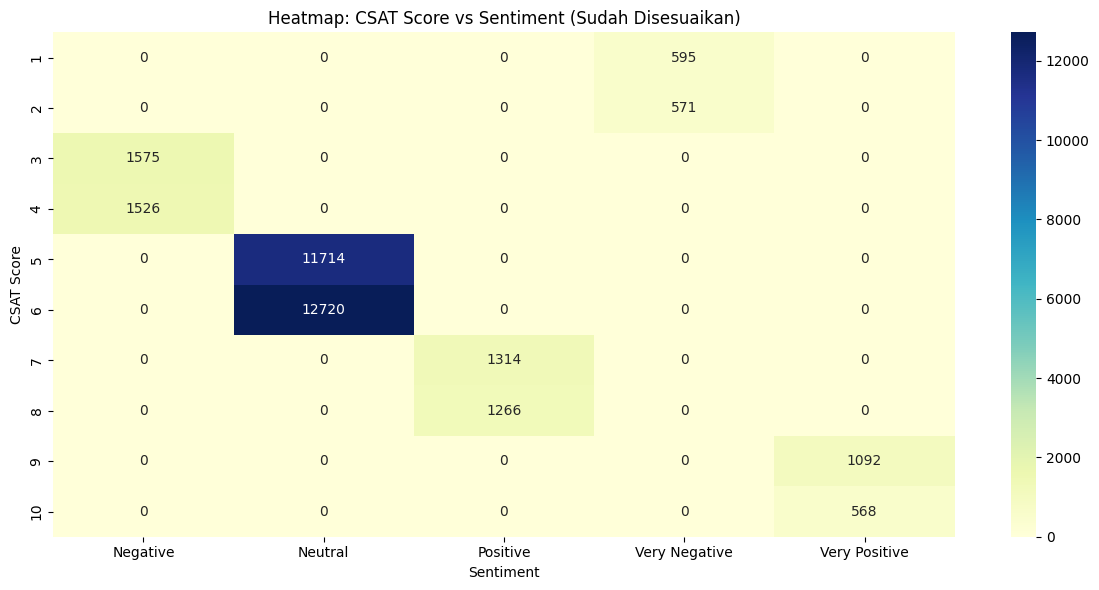

In [ ]:
# 10. Visualisasi konsistensi
plt.figure(figsize=(12, 6))
ct = pd.crosstab(df['Csat_score'], df['Sentiment'])
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap: CSAT Score vs Sentiment (Sudah Disesuaikan)')
plt.ylabel('CSAT Score')
plt.xlabel('Sentiment')
plt.tight_layout()
plt.show()

In [ ]:
# 11. Validasi ulang
print("\n=== Cleaned Data Info ===")
print(df.info())
print("\nSample Data:\n", df.head())


=== Cleaned Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32941 entries, 0 to 32940
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        32940 non-null  object        
 1   Customer_name             32941 non-null  object        
 2   Sentiment                 32941 non-null  object        
 3   Csat_score                32941 non-null  Int64         
 4   Call_timestamp            32941 non-null  datetime64[ns]
 5   Reason                    32941 non-null  object        
 6   City                      32941 non-null  object        
 7   State                     32941 non-null  object        
 8   Channel                   32941 non-null  object        
 9   Response_time             32941 non-null  object        
 10  Call duration in minutes  32941 non-null  int64         
 11  Call_center               32941 non-null  object     

In [ ]:
# 10. Cek distribusi CSAT
print("\nDistribusi Csat_score:\n", df['Csat_score'].value_counts().sort_index())


Distribusi Csat_score:
 Csat_score
1       595
2       571
3      1575
4      1526
5     11714
6     12720
7      1314
8      1266
9      1092
10      568
Name: count, dtype: Int64


In [ ]:
df

,Id,Customer_name,Sentiment,Csat_score,Call_timestamp,Reason,City,State,Channel,Response_time,Call duration in minutes,Call_center,Location
0,QGK-72219678-w-102139-KY,Analise Gairdner,Positive,7,2020-10-29,Billing Question,Detroit,Michigan,Call-Center,Within Sla,17,Los Angeles/Ca,"Detroit, Michigan"
1,GYJ-30025932-A-023015-LD,Crichton Kidsley,Neutral,5,2020-10-05,Service Outage,Spartanburg,South Carolina,Chatbot,Within Sla,23,Baltimore/Md,"Spartanburg, South Carolina"
2,ZJI-96807559-i-620008-m7,Averill Brundrett,Neutral,6,2020-10-04,Billing Question,Gainesville,Florida,Call-Center,Above Sla,45,Los Angeles/Ca,"Gainesville, Florida"
3,DDU-69451719-O-176482-Fm,Noreen Lafflina,Very Negative,1,2020-10-17,Billing Question,Portland,Oregon,Chatbot,Within Sla,12,Los Angeles/Ca,"Portland, Oregon"
4,JVI-79728660-U-224285-4a,Toma Van der Beken,Neutral,6,2020-10-17,Payments,Fort Wayne,Indiana,Call-Center,Within Sla,23,Los Angeles/Ca,"Fort Wayne, Indiana"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32936,UJH-96531654-y-074703-H4,Othelia Ouldcott,Neutral,6,2020-10-30,Billing Question,Oklahoma City,Oklahoma,Web,Within Sla,13,Denver/Co,"Oklahoma City, Oklahoma"
32937,WDS-58440679-I-064360-TT,Tasha Cubbinelli,Neutral,5,2020-10-07,Billing Question,Crawfordsville,Indiana,Chatbot,Within Sla,42,Baltimore/Md,"Crawfordsville, Indiana"
32938,FTZ-87704815-T-824288-iC,Margaux Slaten,Neutral,5,2020-10-04,Billing Question,Lehigh Acres,Florida,Chatbot,Within Sla,30,Baltimore/Md,"Lehigh Acres, Florida"
32939,OOR-17971494-i-311571-PR,Odey Seed,Positive,8,2020-10-27,Payments,Salt Lake City,Utah,Call-Center,Within Sla,38,Baltimore/Md,"Salt Lake City, Utah"


In [ ]:
df.to_csv('cleaned_call_center.csv', index=False)

In [ ]:
# === 2. EDA dan CLUSTERING ===
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
# Tambahkan fitur jam
df['Hour'] = df['Call_timestamp'].dt.hour

In [ ]:
# Clustering dengan fitur numerik
features = ['Csat_score', 'Call duration in minutes']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Clustering dengan KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
# PCA untuk visualisasi
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PCA1'] = components[:,0]
df['PCA2'] = components[:,1]

In [ ]:
# Simpan dataset final
final_path = 'final_call_center_clustered.csv'
df.to_csv(final_path, index=False)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_call_center.csv to cleaned_call_center (1).csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca file yang diupload
df = pd.read_csv('cleaned_call_center.csv', delimiter =',')
df.head()

,Id,Customer_name,Sentiment,Csat_score,Call_timestamp,Reason,City,State,Channel,Response_time,Call duration in minutes,Call_center,Location
0,QGK-72219678-w-102139-KY,Analise Gairdner,Positive,7,2020-10-29,Billing Question,Detroit,Michigan,Call-Center,Within Sla,17,Los Angeles/Ca,"Detroit, Michigan"
1,GYJ-30025932-A-023015-LD,Crichton Kidsley,Neutral,5,2020-10-05,Service Outage,Spartanburg,South Carolina,Chatbot,Within Sla,23,Baltimore/Md,"Spartanburg, South Carolina"
2,ZJI-96807559-i-620008-m7,Averill Brundrett,Neutral,6,2020-10-04,Billing Question,Gainesville,Florida,Call-Center,Above Sla,45,Los Angeles/Ca,"Gainesville, Florida"
3,DDU-69451719-O-176482-Fm,Noreen Lafflina,Very Negative,1,2020-10-17,Billing Question,Portland,Oregon,Chatbot,Within Sla,12,Los Angeles/Ca,"Portland, Oregon"
4,JVI-79728660-U-224285-4a,Toma Van der Beken,Neutral,6,2020-10-17,Payments,Fort Wayne,Indiana,Call-Center,Within Sla,23,Los Angeles/Ca,"Fort Wayne, Indiana"


In [ ]:
# 3: Persiapan dan Feature Engineering
# Konversi kolom waktu
df['Call_timestamp'] = pd.to_datetime(df['Call_timestamp'], errors= 'coerce')

# Tambahkan kolom turunan waktu
df['Month'] = df['Call_timestamp'].dt.to_period('M').astype(str)
df['Day_of_week'] = df['Call_timestamp'].dt.day_name()
df['Hour'] = df['Call_timestamp'].dt.hour


In [ ]:
df.dtypes

,0
Id,object
Customer_name,object
Sentiment,object
Csat_score,int64
Call_timestamp,datetime64[ns]
Reason,object
City,object
State,object
Channel,object
Response_time,object


Visualisasi data (eda)

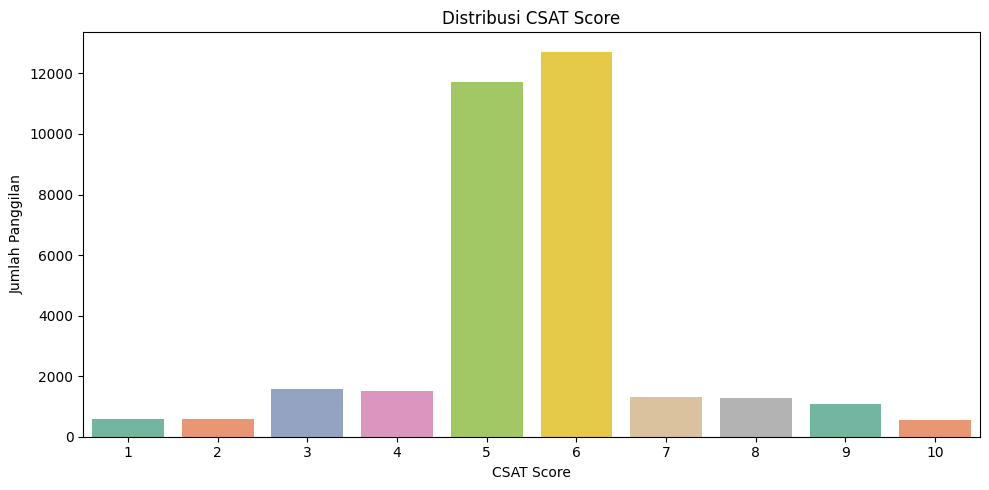

In [ ]:
#1. Distribusi CSAT Score
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Csat_score', palette='Set2')
plt.title('Distribusi CSAT Score')
plt.xlabel('CSAT Score')
plt.ylabel('Jumlah Panggilan')
plt.tight_layout()
plt.show()

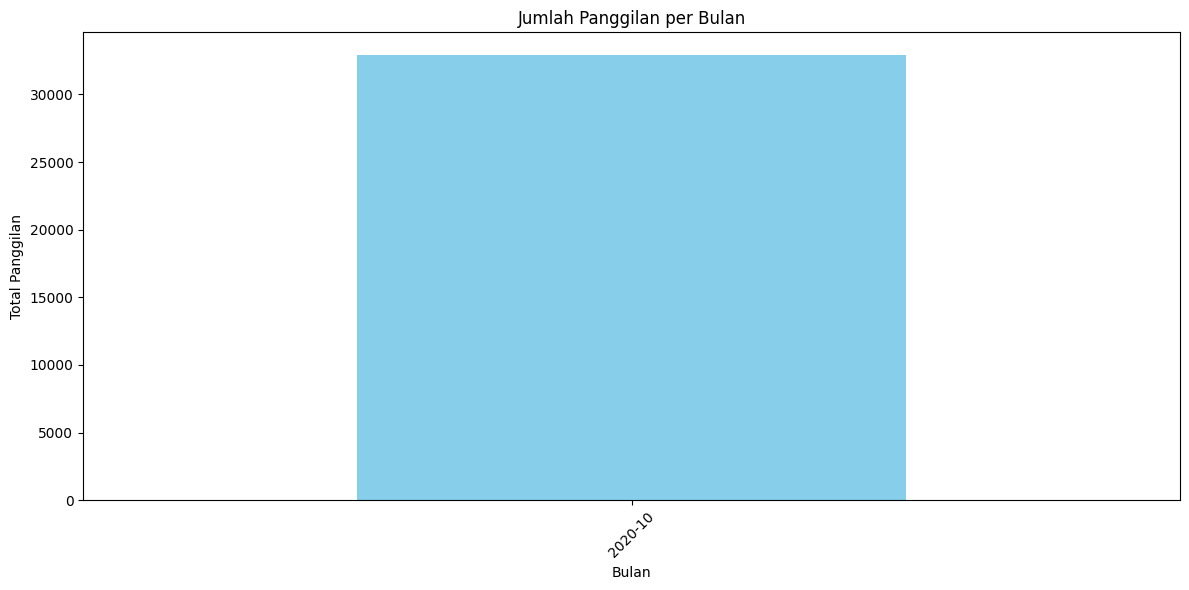

In [ ]:
# Visualisasi jumlah panggilan per bulan
monthly_calls = df.groupby('Month').size()

plt.figure(figsize=(12, 6))
monthly_calls.plot(kind='bar', color='skyblue')
plt.title('Jumlah Panggilan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Panggilan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

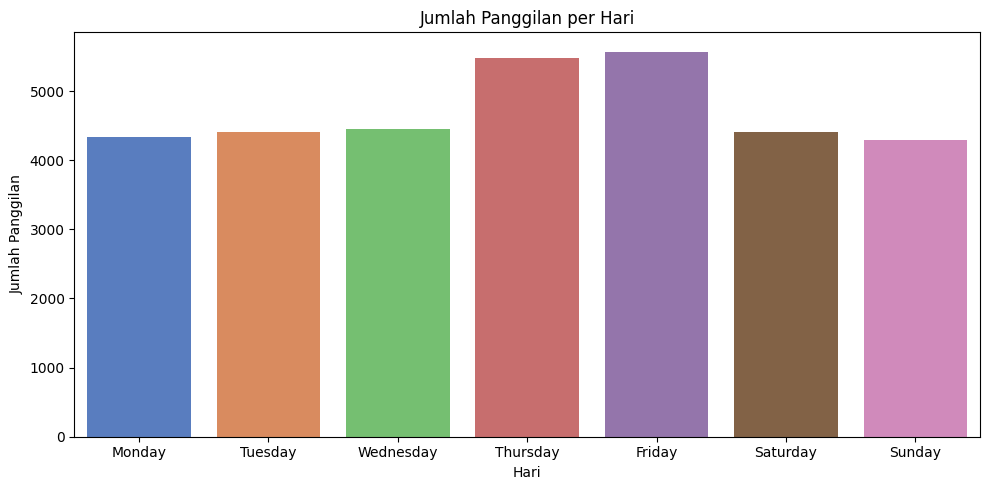

In [ ]:
#Jumlah Panggilan per Hari dalam Seminggu
order_hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Day_of_week', order=order_hari, palette='muted')
plt.title('Jumlah Panggilan per Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Panggilan')
plt.tight_layout()
plt.show()

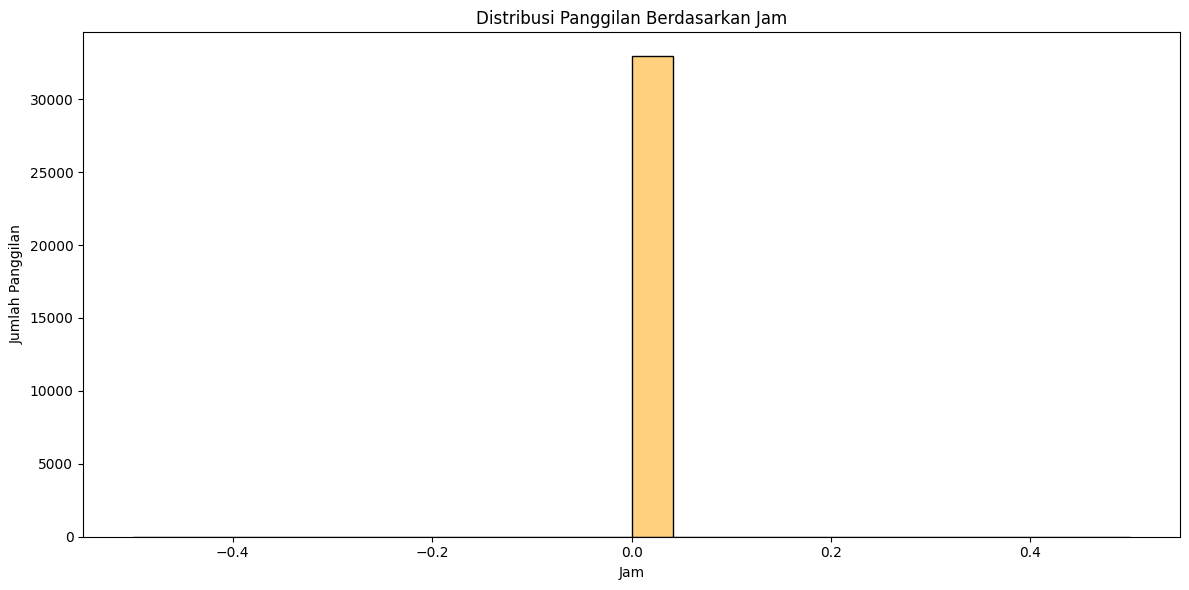

In [ ]:
#Distribusi Panggilan Berdasarkan Jam
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='Hour', bins=24, kde=True, color='orange')
plt.title('Distribusi Panggilan Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Panggilan')
plt.tight_layout()
plt.show()


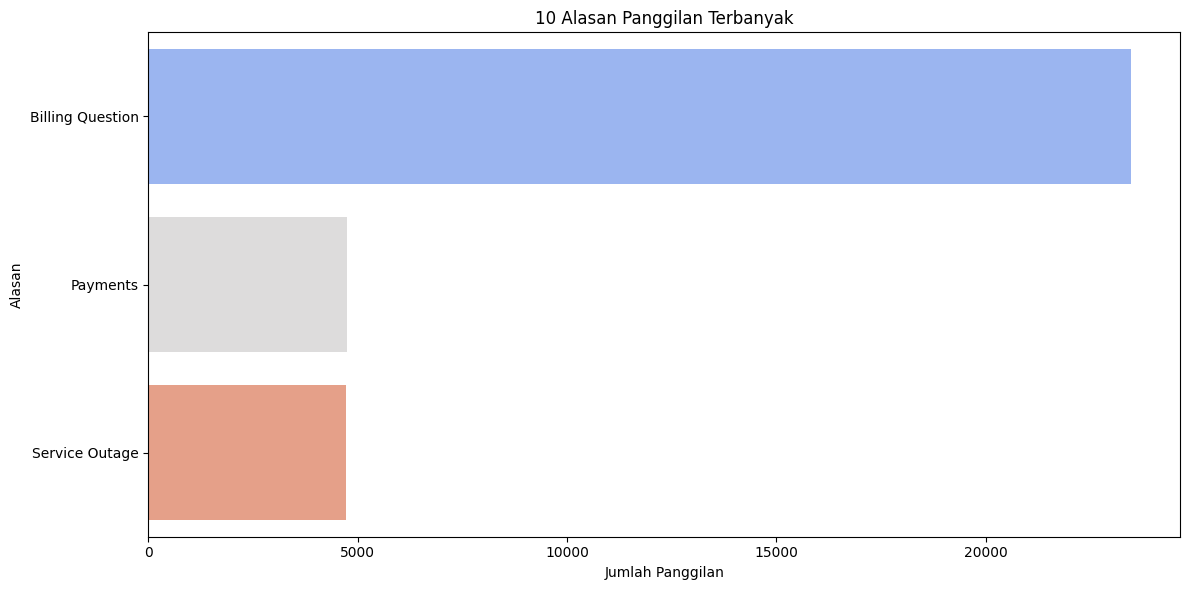

In [ ]:
#Alasan Panggilan (Top 10)
top_reasons = df['Reason'].value_counts().nlargest(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_reasons.values, y=top_reasons.index, palette='coolwarm')
plt.title('10 Alasan Panggilan Terbanyak')
plt.xlabel('Jumlah Panggilan')
plt.ylabel('Alasan')
plt.tight_layout()
plt.show()

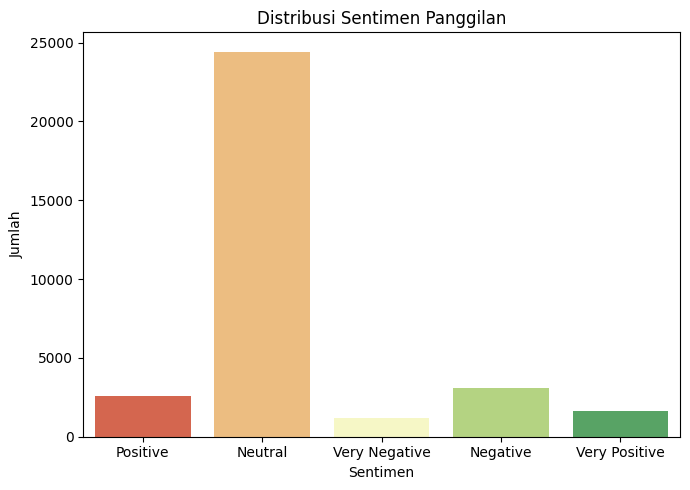

In [ ]:
# 2. Distribusi Sentiment
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Sentiment', palette='RdYlGn')
plt.title('Distribusi Sentimen Panggilan')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

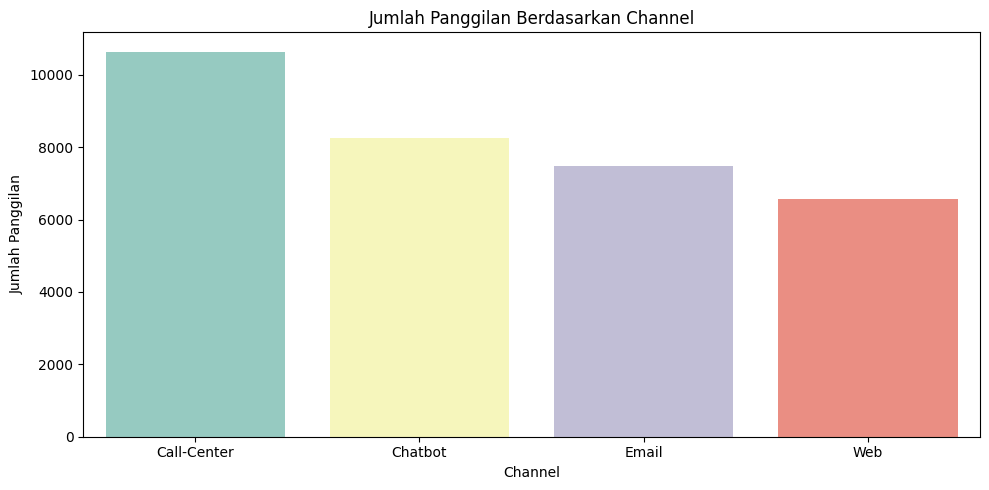

In [ ]:
#Performa Channel Layanan
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Channel', palette='Set3')
plt.title('Jumlah Panggilan Berdasarkan Channel')
plt.xlabel('Channel')
plt.ylabel('Jumlah Panggilan')
plt.tight_layout()
plt.show()


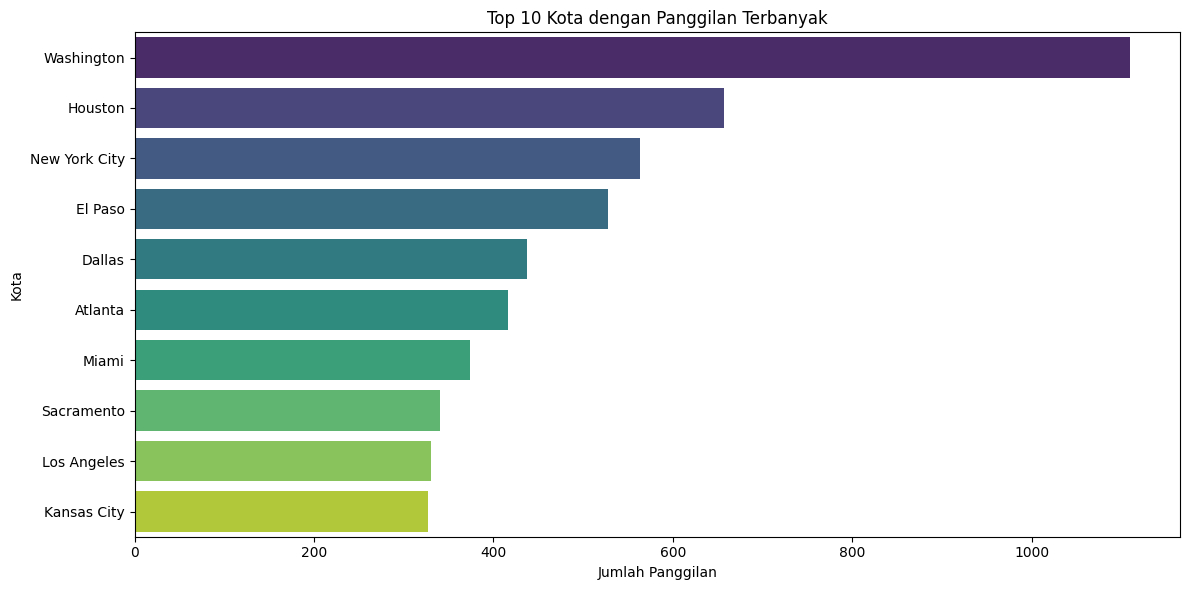

In [ ]:
#Panggilan Berdasarkan Lokasi (Top 10 Kota)
top_cities = df['City'].value_counts().nlargest(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title('Top 10 Kota dengan Panggilan Terbanyak')
plt.xlabel('Jumlah Panggilan')
plt.ylabel('Kota')
plt.tight_layout()
plt.show()

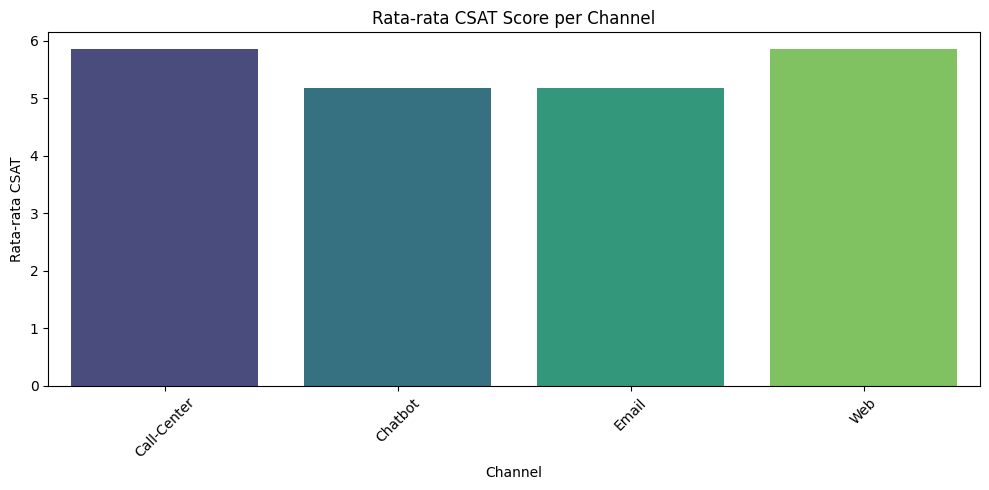

In [ ]:
#  Rata-rata CSAT per Channel
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Channel', y='Csat_score', ci=None, palette='viridis')
plt.title('Rata-rata CSAT Score per Channel')
plt.xlabel('Channel')
plt.ylabel('Rata-rata CSAT')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

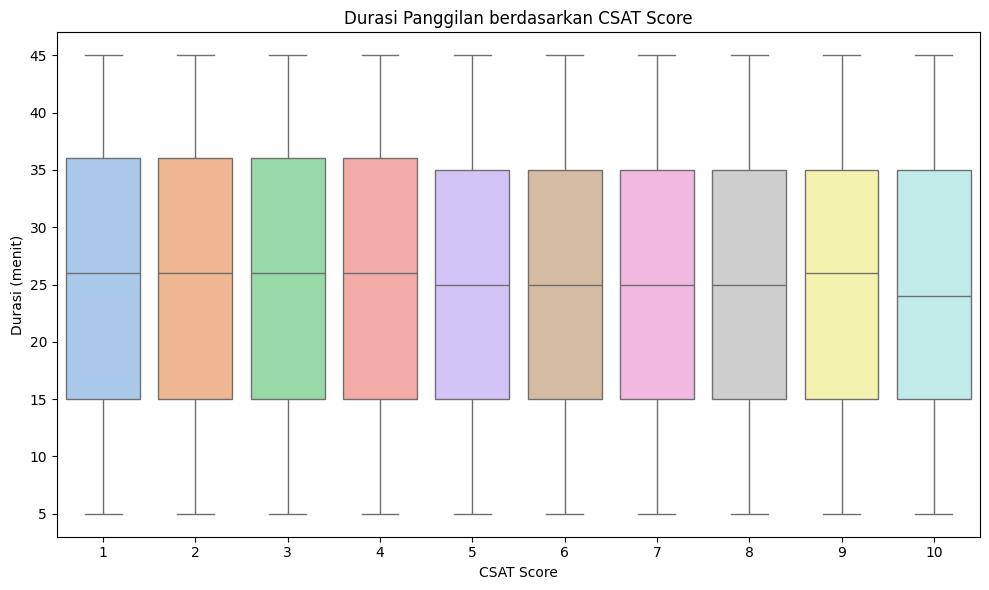

In [ ]:
# 5. Durasi Panggilan vs CSAT Score
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Csat_score', y='Call duration in minutes', palette='pastel')
plt.title('Durasi Panggilan berdasarkan CSAT Score')
plt.xlabel('CSAT Score')
plt.ylabel('Durasi (menit)')
plt.tight_layout()
plt.show()